In [1]:
import numpy as np
import jupyter
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from matplotlib import pyplot 

In [2]:
#compute the loss
def hingeLoss(w, x, y):
    loss_sum = 0
    for i in range(len(y)):  
        temp = 0
        for var_x, var_w in zip(x[i], w): 
            temp += var_w * var_x
        tmp = y[i][0] * temp
        if tmp < 1:
            loss_sum += 1 - tmp
    loss_sum *= c
    W = 0 
    for var in w:
        W += var**2
    loss_sum += W/2
    return loss_sum/len(y)

In [3]:
#compute the gradient
def gradient(w, x, y):
    grad = []
    gradient_cmp=[]
    for i in range(len(y)):  
        temp = 0
        tmp = []
        for var_x, var_w in zip(x[i], w):  
            temp += var_w * var_x
            tmp.append(y[i][0] * var_x * c)

        if y[i][0] * temp <= 1:
            if len(grad):
                for j in range(len(tmp)):
                    grad[j]+=tmp[j]
            else:
                grad = tmp
    for gradi, wi in zip(grad, w):
        gradient_cmp.append(-gradi/len(y) + wi)

    return gradient_cmp




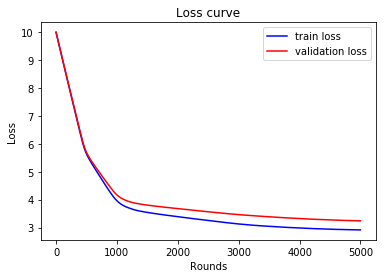

In [5]:
# Load the experiment data
x, y = load_svmlight_file("australian_scale")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train, x_test = x_train.toarray(), x_test.toarray()
y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))

# Initialize parameter  
# learning rate
alpha = 0.0001
#iteration
iteration=5000
#c
c=10
#weight
feature_num = x_train.shape[1]
w =[]   
for i in range(feature_num + 1):
        w.append(0)
x_train = np.c_[x_train, np.ones((x_train.shape[0], 1))].tolist()
y_train = y_train.tolist()
x_test = np.c_[x_test, np.ones((x_test.shape[0], 1))].tolist()
y_test = y_test.tolist()


loss_train = [] # train loss
loss_validation = [] # validation loss
for i in range(iteration):
    grad = gradient(w, x_train, y_train)
    for j in range(len(w)):
        w[j] -= alpha * grad[j]
    loss_train.append(hingeLoss(w, x_train, y_train))
    loss_validation.append(hingeLoss(w, x_test, y_test))

pyplot.title('Loss curve')
pyplot.xlabel('Rounds')
pyplot.ylabel('Loss')
pyplot.plot(loss_train, color="blue", label="train loss")
pyplot.plot(loss_validation, color="red", label="validation loss")
pyplot.legend(loc='upper right')
pyplot.show()